### About this Dataset


## PJM Hourly Energy Consumption Data

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import os

os.chdir(r"C:\Users\willi\GitHub\TS_Energy_Consumption_XGB\data\raw")

In [11]:
PJME_data = pd.read_csv("PJME_hourly.csv")
PJME_data = PJME_data.set_index("Datetime")
PJME_data.index = pd.to_datetime(PJME_data.index)
print("✅ Data loaded successfully")

✅ Data loaded successfully


In [12]:
PJME_data.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [13]:
PJME_data.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


<function matplotlib.pyplot.show(close=None, block=None)>

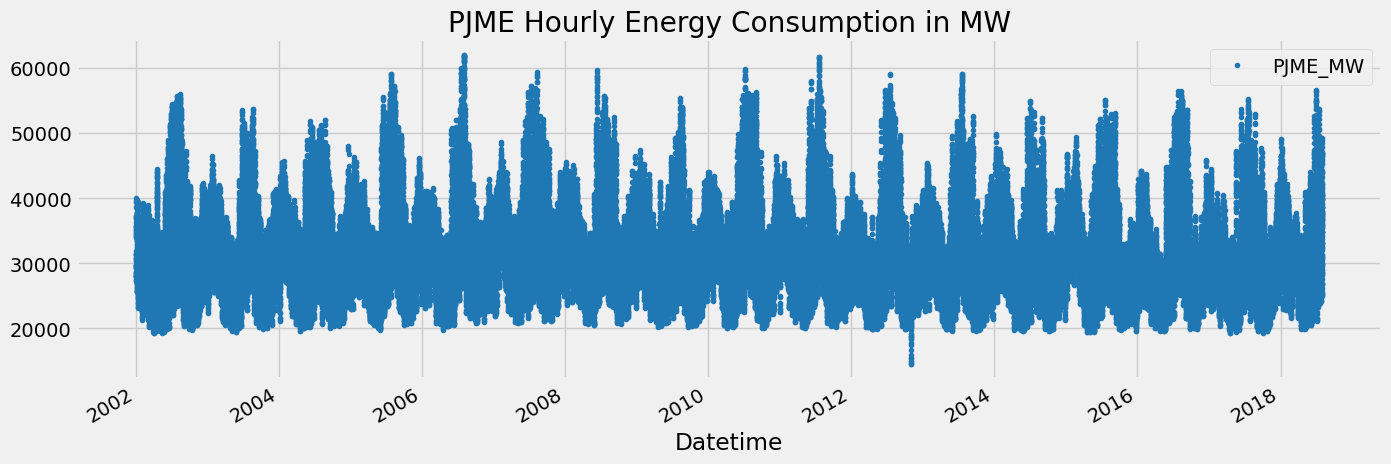

In [15]:
PJME_data.plot(style=".", 
               figsize=(15, 5),
               color=color_pal[0],               
               title="PJME Hourly Energy Consumption in MW",)
plt.show

## Train / Test Spilt

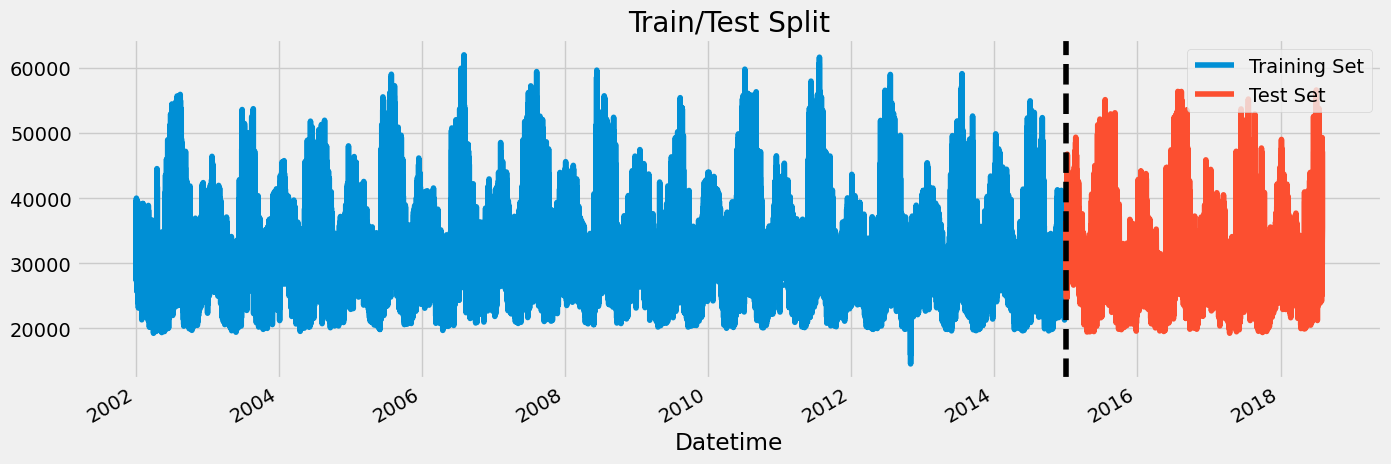

In [17]:
train = PJME_data.loc[PJME_data.index < "01-01-2015"]
test = PJME_data.loc[PJME_data.index >= "01-01-2015"]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label = "Training Set", title="Train/Test Split")
test.plot(ax=ax, label = "Test Set")
ax.axvline("01-01-2015", color="black", linestyle="--")
ax.legend(["Training Set", "Test Set"])
plt.show()

#### Plot of Single week of Data

<Figure size 640x480 with 0 Axes>

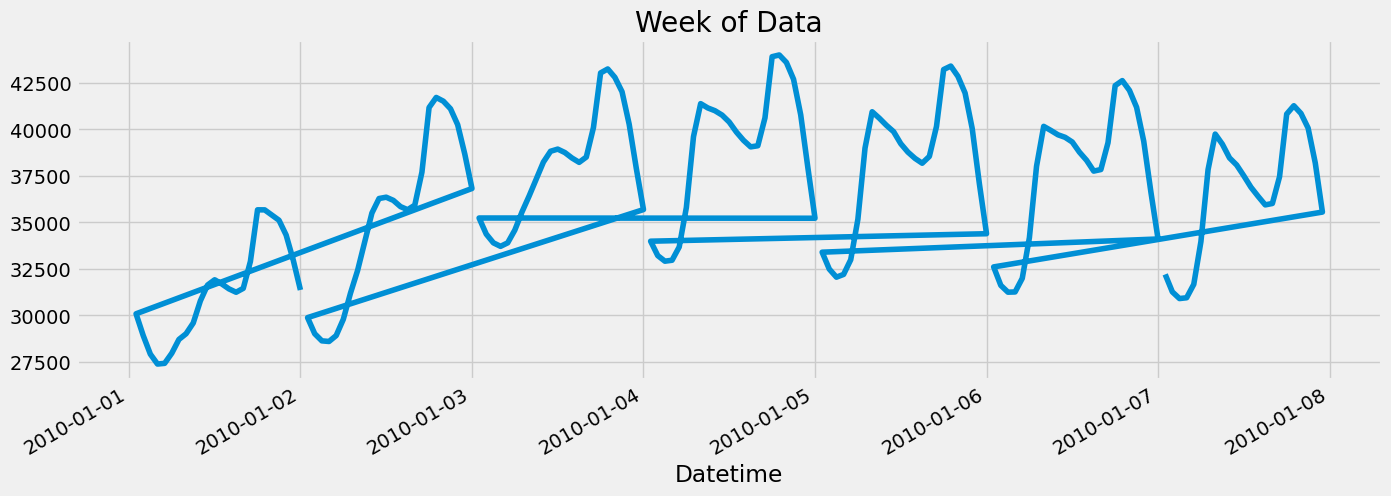

In [26]:
plt.clf()  # Clear current figure
PJME_data.loc[(PJME_data.index > "01-01-2010") & (PJME_data.index < "01-08-2010")] \
    .plot(figsize=(15, 5), title="Week of Data", legend=False)
plt.show()